<hr style="height:6px; background-color:#888; border:none;" />

# Statement of the problem

**Using a functioning PINN network, we want to find the solution of the time independent Schordinger equation fro a simple harmonic oscillator (SHO). The PINN should predict the wave functions for different $n$ values even though it was not seen by the model during training. A very small $n$-set for 1D oscillator will be used, say $n = 0, 1, 3 ,4, 6, 7, 8$ and it should predict wave function for $n=2 \ or  \ 5 $ preety well.** 

_Basically we will provide a set of position ($q \ or \ x$) and potential/angular-frequency ($V \ or \ \omega$) and state quaantum number $n$ to the PINN for training and the trained model should later predict the wavefunction for any set of values of position, potential/angular-frequency and state quaantum number._ 



We normally $\hbar = 1$ , $m = 1$ and $\omega = 1$ (natural units (sometimes called dimensionless units in specific contexts), which is very common in quantum mechanics, particle physics, and field theory). 

Now if we could take $\omega$ as a input which makes the problem/system physically meaningful. This is also mathematically feasible. Just we need to update the potential in our PINN's differential equation accordingly.

Now, once we change the $\omega$, we also need to take care of $m$ as well. For a more realistic sittuation, we would rather get rid of the $m$ as well from the standard solution of the Schrodinger Equation for $1D$ SHO. 

We will use **mass-weighted** coordinates to get rid of this issue. Later we will also use the potential energy ($V$) grid instead of $\omega$ which we might use in  a real problem.

<hr style="height:6px; background-color:#888; border:none;" />


The **standard time independednt  Schrodinger equation for a $1D$ HO** is :


$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi_n(x)}{dx^2} + V(x)\psi_n(x) = E\psi_n(x) \tag{1}
$$

where the potential energy 
$$V(x) = \frac{1}{2}m \omega^2 x^2 \tag{2}$$ 

and the normalized wavefunctions ($\psi_n(x)$) are expressed using standard Hermite polynomials. 


$$
\psi_n(x) = \frac{1}{\sqrt{2^n n!}} \left( \frac{m\omega}{\pi\hbar} \right)^{1/4} 
e^{-\frac{m\omega x^2}{2\hbar}} H_n\left( \sqrt{\frac{m\omega}{\hbar}}\, x \right), \quad n = 0, 1, 2, \ldots   \tag{3}
$$



<hr style="height:6px; background-color:#333; border:none;" />

# Mass-weighted cordinate 

We define 

$$
q = \sqrt{m}x  \qquad or, \  x = \frac{q}{\sqrt{m}} \tag{4}
$$

**Schrodinger equation in mass-weighted coordinate**

Chaning the $x$ into $q$ we get,
$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + \frac{1}{2} m \omega^2 x^2 \psi(x) \Rightarrow  -\frac{\hbar^2}{2} \frac{d^2 \psi(x)}{dq^2} + \frac{1}{2} \omega^2 q^2  \psi(x)      \tag{5}
$$


So in mass-weighted coordinates, the equation becomes:

$$
\frac{\hbar^2}{2} \frac{d^2 \psi(x)}{dq^2} + \frac{1}{2} \omega^2 q^2  \psi(x) = E \psi(x)     \tag{6}
$$

This is to be noted that $\psi_n(x)$ is a function of $x$, and $x = \frac{q}{\sqrt{m}}$, we can write,

$$
\psi_n(q) = \psi_n\left(\frac{q}{\sqrt{m}}\right)    \tag{7}
$$

However, we must also **adjust the normalization**!


Because wavefunction normalization is done in the coordinate's measure:


$$
\int |\psi_n(x)|^2\, dx = 1 
\;\Rightarrow\; 
\int |\psi_n(q)|^2\, \frac{dq}{\sqrt{m}} = 1 
\;\Rightarrow\; 
\int |\psi_n(q)|^2\, dq = \sqrt{m}   \tag{8}
$$
So to keep the wavefunction normalized in $q$-space, you multiply it by $m^{-\frac{1}{4}}$:

$$
\psi_n(q) = m^{-\frac{1}{4}} \psi_n\left(\frac{q}{\sqrt{m}}\right)    \tag{9}
$$

So, in mass-weighted coordinate the full expression for the wavefunctions will be, 
$$
\psi_n(q) = \left( \frac{\omega}{\pi\hbar} \right)^{1/4} \frac{1}{\sqrt{2^n n!}} 
e^{-\frac{\omega q^2}{2\hbar}} H_n\left( \sqrt{\frac{\omega}{\hbar}}\, q \right), \quad n = 0, 1, 2, \ldots   \tag{10}
$$

This wavefunction no longer has an explicit $m$ dependence!

Now, we will have to replace $\omega$ with $V$. 

We know 
$$
V = \frac{1}{2}\omega^2q^2 \Rightarrow \ or, \  \omega = \sqrt{\frac{2V}{q^2}}  \tag{11}
$$

Now, the standard expression for the wavefunction in mass-weighted coordinates is:

$$
\psi_n(q,\omega) = \left( \frac{\omega}{\pi\hbar} \right)^{1/4} \frac{1}{\sqrt{2^n n!}} 
e^{-\frac{\omega q^2}{2\hbar}} H_n\left( \sqrt{\frac{\omega}{\hbar}}\, q \right), \quad n = 0, 1, 2, \ldots   \tag{12}
$$

#### Changing $\psi_n(q,\omega)$ to $\psi_n(q,V)$

Since, $\omega$ can have only positive values, we define

$$
\omega = \frac{\sqrt{2V}}{\left|q\right|}  \tag{13}
$$

Then the wavefunction becomes:




$$
\psi_n(q,V) = \left( \frac{1}{\pi\hbar} \cdot  \frac{\sqrt{2V}}{\left|q\right|} \right)^{1/4} \frac{1}{\sqrt{2^n n!}} 
e^{-\frac{\frac{\sqrt{2V}}{\left|q\right|} q^2}{2\hbar}} H_n\left( \sqrt{\frac{1}{\hbar}\cdot \frac{\sqrt{2V}}{\left|q\right|} }\cdot q \right), \quad n = 0, 1, 2, \ldots   
$$

Since $q^2$ is positive, we can write, 

$$
\boxed{
\psi_n(q,V) = \left( \frac{\sqrt{2V}}{\pi\hbar \left|q\right|} \right)^{1/4} \frac{1}{\sqrt{2^n n!}} 
e^{-\frac{\sqrt{2V}\left|q\right|}{2\hbar}} H_n\left( sign(q)\cdot\sqrt{\frac{\sqrt{2V}\left|q\right|}{\hbar}} \right), \quad n = 0, 1, 2, \ldots   \tag{14}
}
$$

####  This expression is now in terms of $q$, $V$, and $n$, with no explicit appearance of $\omega$ or $m$.






In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import scipy.special as sp
import math

import pickle
from scipy.special import eval_hermite, factorial

import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


import torch.nn.functional as F
import pandas as pd

import copy
from collections import defaultdict


# Define a Neural Network  using PyTorch

In [2]:
# Define the NN model
class NNWaveFunction(nn.Module):
    def __init__(self, in_dim=3, hidden_dim=64, num_layers=4):
        super(NNWaveFunction, self).__init__()
        layers = []
        layers.append(nn.Linear(in_dim, hidden_dim))
        layers.append(nn.Tanh())

        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.Tanh())

        layers.append(nn.Linear(hidden_dim, 1))  # output: psi_n(q, V)
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# Wavefunction frm q, V and n

In [3]:

# True psi
def wavefunction_from_qVn(q_batch, V_batch, n_grid, hbar=1.0):
    """
    Compute psi_n(q, V) using the boxed formula.

    Args:
        q_batch: (B, 240) tensor of q-values
        V_batch: (B, 240) tensor of V-values
        n_grid: (B, 1) tensor of quantum numbers
        hbar: Planck constant (default = 1)

    Returns:
        psi_batch: (B, 240) tensor of wavefunction values
    """
    eps = 1e-10  # to avoid division by zero

    q_np = q_batch.cpu().numpy()
    V_np = V_batch.cpu().numpy()
    n_np = n_grid.squeeze(-1).cpu().numpy()

    B, L = q_np.shape
    psi_list = []

    for b in range(B):
        q = q_np[b]
        V = V_np[b]
        n = n_np[b]

        abs_q = np.abs(q) + eps
        sqrt_2V = np.sqrt(2 * V)
        prefactor = (sqrt_2V / (np.pi * hbar * abs_q))**0.25
        coeff = 1 / np.sqrt(2**n * factorial(n))

        argument = np.sign(q) * np.sqrt((sqrt_2V * abs_q) / hbar)
        Hn = eval_hermite(n, argument)
        exponential = np.exp(-sqrt_2V * abs_q / (2 * hbar))

        psi = prefactor * coeff * exponential * Hn
        psi_list.append(psi)

    psi_batch = torch.tensor(psi_list, dtype=torch.float32)
    return psi_batch



# Supervised data-set and loss function

In [4]:
# Create q, n, omega for supervised loss
q_values = torch.linspace(-6, 6, steps=240)              # Shape: (240,)
n_values = torch.tensor([0, 1, 2, 4, 5, 7, 8, 9])  # (8,)                        # Shape: (8,)
#n_values = torch.tensor([0, 2, 6, 8, 10, 12, 14, 16])  # (8,)                        # Shape: (8,);  only even values

omega_values = torch.linspace(0.5, 2.0, steps=11) # Shape: (11,)

# Create meshgrid for q, n, omega (total: 8 * 11 = 88 combos)
q_grid, omega_grid = torch.meshgrid(q_values, omega_values, indexing='ij')  # Shape: (8, 11)
V_grid = 0.5 * q_grid**2 * omega_grid**2 

print(q_grid.shape, omega_grid.shape, V_grid.shape )

# Expand to batch all (ω, n) combinations
"""
num_q1 = q_values.shape[0]
num_omega1 = len(omega_values)
num_n1 = len(n_values)
batch_size = num_omega1 * num_n1  # 88
print(num_q1, num_omega1,num_n1, batch_size )
"""
num_q = len(q_values)
num_omega = len(omega_values)
num_n = len(n_values)
batch_size = num_omega * num_n  # 88
print(num_q, num_omega,num_n, batch_size )

# Repeat q and V for each n value
q_exp = q_grid.unsqueeze(-1).repeat(1, 1, num_n)     # (240, 11, 8)
V_exp = V_grid.unsqueeze(-1).repeat(1, 1, num_n)     # (240, 11, 8)
print(q_exp.shape, V_exp.shape)
print(q_exp[...,7].shape)

# Transpose and reshape to batch
q_batch = q_exp.permute(2, 1, 0).reshape(-1, num_q)  # (88, 240)
V_batch = V_exp.permute(2, 1, 0).reshape(-1, num_q)  # (88, 240)

print(q_batch.shape, V_batch.shape)
print(q_batch[...,170].shape)

# Prepare n_grid: one n per sample (shape: batch, 1)
n_values_repeat = n_values.repeat_interleave(num_omega)  # (8,) → (88,)
n_grid = n_values_repeat.view(-1, 1)  # (88, 1)


psi_batch = wavefunction_from_qVn(q_batch, V_batch, n_grid)
# ✅ Final shapes
print("q_batch", q_batch.shape)  # (88, 240)
print("v_batch", V_batch.shape)  # (88, 240)
print("n_grid:", n_grid.shape)      # (88, 1)
print("psi_batch", psi_batch.shape)  # (88, 240)


# Prepare the training dataset

# Flatten q, V, n, and psi for supervised learning

B, N = q_batch.shape  # (88, 240)
q_flat = q_batch.reshape(-1, 1)        # (88*240, 1)
V_flat = V_batch.reshape(-1, 1)        # (88*240, 1)
n_expanded = n_grid.repeat_interleave(N, dim=0)  # (88*240, 1)

# Stack the inputs
X_input = torch.cat([q_flat, V_flat, n_expanded], dim=1)  # shape: (88*240, 3)

# Ground truth wavefunctions
y_target = psi_batch.reshape(-1, 1)  # shape: (88*240, 1)

print("\nFinal shape for the inputs for training.")

print(f"Input shape: {X_input.shape}, Target shape: {y_target.shape}")


# Create DataLoader
# Necessary for training
data_dataset = TensorDataset(X_input, y_target)
data_loader = DataLoader(data_dataset, batch_size=2048, shuffle=False)
#data_loader = DataLoader(data_dataset, batch_size=2048, shuffle=True)



# Data loss: Standard MSE loss for supervised training
def compute_data_loss(model, Xdata_input, target):
    """
    Standard supervised MSE loss.
    
    Args:
    - pred: predicted ψ values from the model
    - target: true ψ values
    
    Returns:
    - MSE loss (torch scalar)
    """
    pred = model(Xdata_input)
    return F.mse_loss(pred, target)


torch.Size([240, 11]) torch.Size([240, 11]) torch.Size([240, 11])
240 11 8 88
torch.Size([240, 11, 8]) torch.Size([240, 11, 8])
torch.Size([240, 11])
torch.Size([88, 240]) torch.Size([88, 240])
torch.Size([88])
q_batch torch.Size([88, 240])
v_batch torch.Size([88, 240])
n_grid: torch.Size([88, 1])
psi_batch torch.Size([88, 240])

Final shape for the inputs for training.
Input shape: torch.Size([21120, 3]), Target shape: torch.Size([21120, 1])


/tmp/ipykernel_2511864/4074570210.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  psi_batch = torch.tensor(psi_list, dtype=torch.float32)


In [5]:
#Checking if the DATA loss function is working 
model= NNWaveFunction()
print("\n DATA LOSS")
#DATA LOSS : data > X_input, y_target  

loss_data = compute_data_loss(model, X_input, y_target)
print(loss_data)  # Should print a scalar tensor like tensor(0.1234, grad_fn=...)


 DATA LOSS
tensor(0.1178, grad_fn=<MseLossBackward0>)


In [6]:
def plot_wavefunction_by_omega(q_batch, psi_batch, n_grid, omega_index, n_indices_for_plot):
    """
    Plots wavefunctions for a fixed omega_index and specified n values.

    Args:
        q_batch: (88, 240)
        psi_batch: (88, 240)
        n_grid: (88, 1)
        omega_index: integer (0 to 10)
        n_indices_for_plot: list of integers corresponding to n indices (e.g., [0, 2, 3, 4])
    """
    plt.figure(figsize=(10, 5))

    for n_idx in n_indices_for_plot:
        batch_idx = n_idx * 11 + omega_index  # fixed omega, vary n
        q = q_batch[batch_idx].cpu().numpy()
        psi = psi_batch[batch_idx].cpu().numpy()
        n_val = n_grid[batch_idx].item()
        plt.plot(q, psi, label=f"n = {n_val}, ω_idx = {omega_index}")

    plt.title(f"Harmonic Oscillator Wavefunctions at ω_idx = {omega_index}")
    plt.xlabel("q")
    plt.ylabel(r"$\psi_n(q)$")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Checking if the created datset produces the analytical wavefunctions.


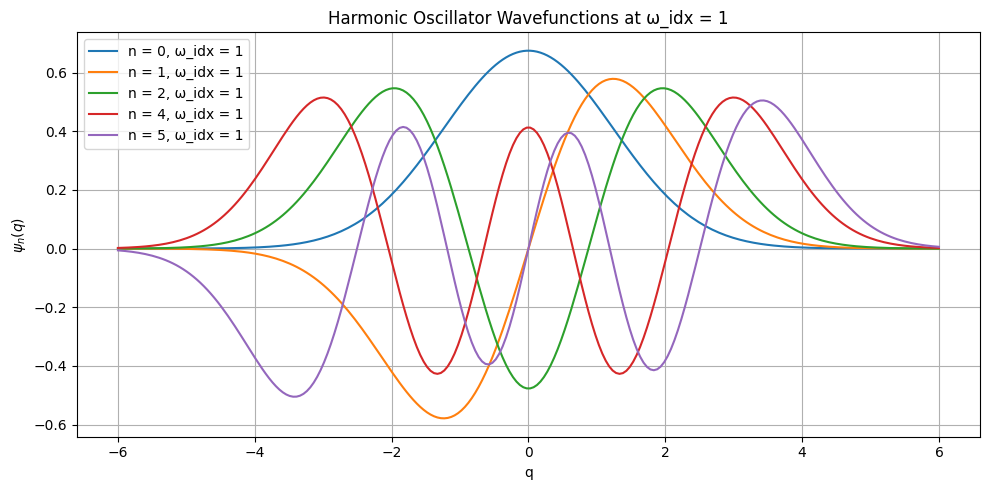

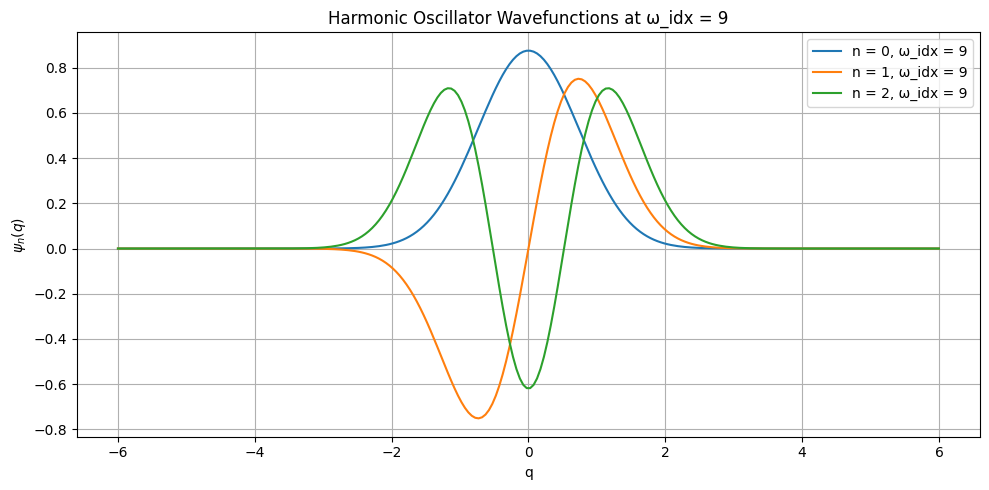

In [7]:
print("Checking if the created datset produces the analytical wavefunctions.")
psi_batch = wavefunction_from_qVn(q_batch, V_batch, n_grid)
plot_wavefunction_by_omega(q_batch, psi_batch, n_grid, omega_index=1, n_indices_for_plot=[0, 1, 2,3, 4])
plot_wavefunction_by_omega(q_batch, psi_batch, n_grid, omega_index=9, n_indices_for_plot=[0, 1, 2])

# Data-set for PHYSICS-LOSS, NORMALIZATION-LOSS, NODAL and PARITY LOSS

In [8]:

# 1. High-resolution q-grid (symmetric)
qnp_vals = torch.linspace(-6, 6, 2400)  # (2400,)
num_q = qnp_vals.shape[0]

# 2. Define omega and quantum number values
omega_vals = torch.tensor([0.51, 0.61, 0.71, 0.81, 0.91, 1.10, 1.11, 1.12, 1.31, 1.41, 1.51])  # (11,)
n_vals = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7])  # (8,)
#n_vals = torch.tensor([0, 2, 4, 6, 8, 10, 12, 14])  # (8,)
num_omega = len(omega_vals)
num_n = len(n_vals)
total_combinations = num_omega * num_n  # 88 total combinations

# 3. Create meshgrid of (q, omega)
q_grid, omega_grid = torch.meshgrid(qnp_vals, omega_vals, indexing='ij')  # (2400, 11)
V_grid = 0.5 * omega_grid**2 * q_grid**2  # Compute V(q) = 0.5 * ω² * q²  — shape (2400, 11)

# 4. Expand for each n value
q_exp = q_grid.unsqueeze(-1).repeat(1, 1, num_n)   # (2400, 11, 8)
V_exp = V_grid.unsqueeze(-1).repeat(1, 1, num_n)   # (2400, 11, 8)

# 5. Reshape to form batches of shape (88, 2400)
q_batch = q_exp.permute(2, 1, 0).reshape(-1, num_q)  # (88, 2400)
V_batch = V_exp.permute(2, 1, 0).reshape(-1, num_q)  # (88, 2400)

# 6. Construct n_batch: each row has constant n across all q-points
n_batch = n_vals.repeat_interleave(num_omega).view(-1, 1).repeat(1, num_q)  # (88, 2400)

# 7. Create TensorDataset and DataLoader

batch_size = 88  # Use full batch unless you want to loop through partial batches

physics_dataset =  TensorDataset(q_batch, V_batch, n_batch)
physics_loader = DataLoader(physics_dataset, batch_size=batch_size, shuffle=False)

norm_dataset = TensorDataset(q_batch, V_batch, n_batch)
norm_loader = DataLoader(norm_dataset, batch_size=batch_size, shuffle=False)

nodal_dataset = TensorDataset(q_batch, V_batch, n_batch)
nodal_loader = DataLoader(nodal_dataset, batch_size=batch_size, shuffle=False)

parity_dataset = TensorDataset(q_batch, V_batch, n_batch)
parity_loader = DataLoader(parity_dataset, batch_size=batch_size, shuffle=False)

In [9]:
# --- Final check ---
print("Final dataset shapes:")
print("q_batch     :", q_batch.shape)     # (88, 2400)
print("V_batch     :", V_batch.shape)     # (88, 2400)
print("n_batch     :", n_batch.shape)     # (88, 2400)



Final dataset shapes:
q_batch     : torch.Size([88, 2400])
V_batch     : torch.Size([88, 2400])
n_batch     : torch.Size([88, 2400])


# Physics-loss function

In [10]:


# Physics loss: Residual of the Schrödinger equation
def compute_physics_loss(model, q_batch, V_batch, n_batch, epsilon=1e-4, debug=False):
    batch_size, num_q = q_batch.shape

    # Flatten to 1D
    q = q_batch.reshape(-1, 1).clone().detach().requires_grad_(True)  # (88*2400, 1)
    V = V_batch.reshape(-1, 1)
    n = n_batch.reshape(-1, 1).float()

    # Compute omega safely
    omega = torch.sqrt((2.0 * torch.abs(V)) / (torch.abs(q) + epsilon))
    omega = torch.clamp(omega, min=0.1, max=10.0)

    # Model input: concatenate [q, V, n] or [q, omega, n] depending on what your model was trained on
    model_input = torch.cat([q, V, n], dim=1)  # shape: (88*2400, 3)

    # Forward pass
    psi = model(model_input)

    # First derivative
    dpsi_dq = torch.autograd.grad(
        outputs=psi, inputs=q, grad_outputs=torch.ones_like(psi),
        create_graph=True, retain_graph=True
    )[0]

    # Second derivative
    d2psi_dq2 = torch.autograd.grad(
        outputs=dpsi_dq, inputs=q, grad_outputs=torch.ones_like(dpsi_dq),
        create_graph=True, retain_graph=True
    )[0]

    # Energy: E_n = ω * (n + 0.5)
    E = omega * (n + 0.5)

    # Residual of the Schrödinger equation
    residual = -0.5 * d2psi_dq2 + V * psi - E * psi

    if debug:
        print(f"ω stats: mean={omega.mean().item():.4f}, std={omega.std().item():.4f}")
        print(f"ψ stats: mean={psi.mean().item():.4f}, std={psi.std().item():.4f}")
        print(f"Residual stats: mean={residual.mean().item():.4e}, std={residual.std().item():.4e}")

    return torch.mean(residual**2)



In [11]:

print("\n PHYSIC LOSS")
loss_phys = compute_physics_loss(model, q_batch, V_batch, n_batch)
print(loss_phys)  # Should print a scalar tensor like tensor(0.1234, grad_fn=...)



 PHYSIC LOSS
tensor(0.6048, grad_fn=<MeanBackward0>)


# Normalization loss function

In [12]:
def compute_normalization_loss(model, q_batch, V_batch, n_batch):
    """
    Computes normalization loss across a batch of (omega, n) combinations.
    
    Args:
        model: The PINN model.
        q_batch: Tensor of shape [B, N], where B is number of (ω, n) pairs, and N is number of q-points.
        V_batch: Tensor of shape [B, N].
        n_batch: Tensor of shape [B, N].

    Returns:
        Scalar normalization loss (penalizing deviations from ∫|ψ|² = 1 for each pair).
    """

    B, N = q_batch.shape
    dq = (q_batch[0, -1] - q_batch[0, 0]) / (N - 1)  # Uniform spacing assumed

    # Prepare model input: reshape to (B*N, 3)
    q_flat = q_batch.reshape(-1, 1)
    V_flat = V_batch.reshape(-1, 1)
    n_flat = n_batch.reshape(-1, 1)

    X_input = torch.cat([q_flat, V_flat, n_flat], dim=1)

    # Predict wavefunction
    psi_flat = model(X_input)
    psi_squared = psi_flat ** 2

    # Reshape back to (B, N) to integrate per sample
    psi_sq_batch = psi_squared.view(B, N)

    # Compute integrals for each (ω, n) pair
    integrals = torch.sum(psi_sq_batch * dq, dim=1)

    # Loss: L1 or L2 deviation from 1
    loss = torch.mean((integrals - 1.0).abs())  # or (integrals - 1.0)**2 for L2

    return loss


In [13]:
print("\n NORMALIZATION LOSS")
loss_norm = compute_normalization_loss(model, q_batch, V_batch, n_batch)

# Print the computed normalization loss
print(loss_norm)  # Should print a scalar tensor like tensor(0.1234, grad_fn=...)


 NORMALIZATION LOSS
tensor(0.7421, grad_fn=<MeanBackward0>)


# Dirichlet BC Loss (ψ = 0 at boundaries)

In [14]:
def compute_dirichlet_bc_loss(model, q_batch, V_batch, n_batch):
    """
    Enforces Dirichlet boundary condition: ψ(q=±q_max) = 0
    """

    q_left = q_batch[:, 0].unsqueeze(1)     # (88, 1)
    q_right = q_batch[:, -1].unsqueeze(1)   # (88, 1)

    V_left = V_batch[:, 0].unsqueeze(1)
    V_right = V_batch[:, -1].unsqueeze(1)

    n_left = n_batch[:, 0].unsqueeze(1)
    n_right = n_batch[:, -1].unsqueeze(1)

    input_left = torch.cat([q_left, V_left, n_left], dim=1)
    input_right = torch.cat([q_right, V_right, n_right], dim=1)

    psi_left = model(input_left)
    psi_right = model(input_right)

    # Loss = ψ² at both ends, mean over 88
    loss = torch.mean(psi_left**2 + psi_right**2)

    return loss


In [15]:
print("\n Direchlet loss")
loss_d = compute_dirichlet_bc_loss(model, q_batch, V_batch, n_batch)


print(loss_d) 


 Direchlet loss
tensor(0.0223, grad_fn=<MeanBackward0>)


# Neumann BC Loss (∂ψ/∂q = 0 at boundaries)

In [16]:
def compute_neumann_bc_loss(model, q_batch, V_batch, n_batch):
    """
    Enforces Neumann boundary condition: ∂ψ/∂q(q=±q_max) = 0
    """

    q_left = q_batch[:, 0].unsqueeze(1).clone().detach().requires_grad_(True)
    q_right = q_batch[:, -1].unsqueeze(1).clone().detach().requires_grad_(True)

    V_left = V_batch[:, 0].unsqueeze(1)
    V_right = V_batch[:, -1].unsqueeze(1)

    n_left = n_batch[:, 0].unsqueeze(1)
    n_right = n_batch[:, -1].unsqueeze(1)

    input_left = torch.cat([q_left, V_left, n_left], dim=1)
    input_right = torch.cat([q_right, V_right, n_right], dim=1)

    psi_left = model(input_left)
    psi_right = model(input_right)

    grad_psi_left = torch.autograd.grad(
        outputs=psi_left, inputs=q_left,
        grad_outputs=torch.ones_like(psi_left),
        create_graph=True, retain_graph=True, only_inputs=True
    )[0]

    grad_psi_right = torch.autograd.grad(
        outputs=psi_right, inputs=q_right,
        grad_outputs=torch.ones_like(psi_right),
        create_graph=True, retain_graph=True, only_inputs=True
    )[0]

    # Loss = (∂ψ/∂q)² at both ends, mean over 88
    loss = torch.mean(grad_psi_left**2 + grad_psi_right**2)

    return loss


In [17]:
print("\n Neumann loss")
loss_n = compute_neumann_bc_loss(model, q_batch, V_batch, n_batch)


print(loss_n) 


 Neumann loss
tensor(3.5875e-05, grad_fn=<MeanBackward0>)


# Nodal-loss function

In [18]:

def nodal_loss(model, q_batch, V_batch, n_batch):
    """
    Compute nodal loss by comparing predicted and true number of nodes in ψ(q)
    for each (ω, n) combination.

    Args:
        model:       The PINN model taking input [q, V, n]
        q_batch:     Tensor of shape (B, Nq), sorted q-values
        V_batch:     Tensor of shape (B, Nq), corresponding potentials
        n_batch:     Tensor of shape (B, Nq), target quantum numbers (constant per row)

    Returns:
        torch scalar: mean squared node-count error across all B samples
    """
    B, Nq = q_batch.shape

    # Prepare input for the model: shape (B, Nq, 3)
    model_input = torch.stack([q_batch, V_batch, n_batch], dim=-1)  # (B, Nq, 3)

    # Predict ψ(q) from the model
    psi_pred = model(model_input).squeeze(-1)  # (B, Nq)

    node_errors = []

    for i in range(q_batch.shape[0]):  # Loop over B = 88 combinations
        psi_i = psi_pred[i]            # (2400,)
        n_true = n_batch[i, 0].item()  # Integer value of n

        # Count sign changes in ψ_i(q)
        sign_changes = psi_i[:-1] * psi_i[1:] < 0
        n_pred = sign_changes.sum().item()

        # Squared error in node count
        error = (n_pred - n_true) ** 2
        node_errors.append(error)

    return torch.tensor(node_errors, dtype=torch.float32).mean()





In [19]:
print("\n NODAL LOSS")

loss_nodal = nodal_loss(model, q_batch, V_batch, n_batch)

# Print the computed normalization loss
print(loss_nodal)  # Should print a scalar tensor like tensor(0.1234, grad_fn=...)


 NODAL LOSS
tensor(17.5000)


# Parity loss function

In [20]:

# Parity loss: Ensures that the wavefunction has the correct symmetry
def compute_parity_loss(model, q_batch, V_batch, n_batch, debug=False):
    """
    Computes the parity loss per wavefunction (ψ(-q) ≈ (-1)^n ψ(q)).

    Args:
        model:     PINN model that takes (q, V, n)
        q_batch:   (B, Nq)
        V_batch:   (B, Nq)
        n_batch:   (B, Nq)

    Returns:
        torch.Tensor: Scalar parity loss
    """
    B, Nq = q_batch.shape

    # Prepare input for ψ(q)
    input_q = torch.stack([q_batch, V_batch, n_batch], dim=-1)  # (B, Nq, 3)
    psi_q = model(input_q).squeeze(-1)                          # (B, Nq)

    # Prepare input for ψ(-q)
    q_neg = -q_batch
    input_neg_q = torch.stack([q_neg, V_batch, n_batch], dim=-1)
    psi_neg_q = model(input_neg_q).squeeze(-1)                  # (B, Nq)

    # Compute (-1)^n as a scalar per wavefunction (assuming n constant per row)
    n_values = n_batch[:, 0]                 # (B,)
    parity_sign = (-1.0) ** n_values         # (B,)
    parity_sign = parity_sign[:, None]       # (B, 1) for broadcasting

    # Compute residual: ψ(-q) − (−1)^n ψ(q)
    parity_residual = psi_neg_q - parity_sign * psi_q           # (B, Nq)

    # Mean squared error per wavefunction
    parity_loss_per_wavefn = torch.mean(parity_residual**2, dim=1)  # (B,)

    # Total parity loss
    total_parity_loss = torch.mean(parity_loss_per_wavefn)

    if debug:
        print(f"Parity loss per wavefunction: mean={parity_loss_per_wavefn.mean():.4e}, "
              f"std={parity_loss_per_wavefn.std():.4e}")

    return total_parity_loss


In [21]:

print("\n PARITY LOSS")

loss_parity = compute_parity_loss(model, q_batch, V_batch, n_batch)
print("Parity loss:", loss_parity.item())


 PARITY LOSS
Parity loss: 0.04621006175875664


# Training function/module

In [22]:

from itertools import cycle

def train_pinn_model(model, optimizer,
                     data_loader, physics_loader,
                     norm_loader, nodal_loader, parity_loader,
                     w_data, w_phys, w_bcD, w_bcN, w_norm, w_nodal, w_parity,
                     n_epochs, log_interval,
                     model_save_path=None, best_model_path=None):
    """
    Train PINN model using pre-defined loss functions and data loaders.
    """

    best_loss = float('inf')
    loss_history = {key: [] for key in ['data', 'physics', 'bcD', 'bcN', 'norm', 'nodal', 'parity', 'total']}

    data_iter = cycle(data_loader)
    norm_iter = cycle(norm_loader)
    nodal_iter = cycle(nodal_loader)
    parity_iter = cycle(parity_loader)

    for epoch in range(n_epochs):
        model.train()
        epoch_loss = {k: 0.0 for k in loss_history}

        for batch_idx, (q_phys, V_phys, n_phys) in enumerate(physics_loader):
            # Get batches from other loaders
            X_data, y_data = next(data_iter)
            q_norm, V_norm, n_norm = next(norm_iter)
            q_nodal, V_nodal, n_nodal = next(nodal_iter)
            q_parity, V_parity, n_parity = next(parity_iter)

            # Compute losses (these functions must be defined in the same script/module)
            loss_data   = w_data   * compute_data_loss(model, X_data, y_data)
            loss_phys   = w_phys   * compute_physics_loss(model, q_phys, V_phys, n_phys)
            loss_bcD    = w_bcD    * compute_dirichlet_bc_loss(model, q_phys, V_phys, n_phys)
            loss_bcN    = w_bcN    * compute_neumann_bc_loss(model, q_phys, V_phys, n_phys)
            loss_norm   = w_norm   * compute_normalization_loss(model, q_norm, V_norm, n_norm)
            loss_nodal  = w_nodal  * nodal_loss(model, q_nodal, V_nodal, n_nodal)
            loss_parity = w_parity * compute_parity_loss(model, q_parity, V_parity, n_parity)

            # Total loss
            total_loss = (loss_data + loss_phys + loss_bcD + 
                          loss_bcN + loss_norm + loss_nodal + loss_parity)

            # Backpropagation
            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()

            # Track losses
            epoch_loss['data']   += loss_data.item()
            epoch_loss['physics']+= loss_phys.item()
            epoch_loss['bcD']    += loss_bcD.item()
            epoch_loss['bcN']    += loss_bcN.item()
            epoch_loss['norm']   += loss_norm.item()
            epoch_loss['nodal']  += loss_nodal.item()
            epoch_loss['parity'] += loss_parity.item()
            epoch_loss['total']  += total_loss.item()

            if batch_idx % log_interval == 0:
                print(f"Epoch [{epoch+1}/{n_epochs}], Batch [{batch_idx}] | Total Loss: {total_loss.item():.6e}")

        # Average over batches
        num_batches = len(physics_loader)
        for key in loss_history:
            loss_history[key].append(epoch_loss[key] / num_batches)

        print(f"\nEpoch [{epoch+1}/{n_epochs}] Summary:")
        for key, value in loss_history.items():
            print(f"{key:<8}: {value[-1]:.6e}")

        # Save best model
        if loss_history['total'][-1] < best_loss and best_model_path:
            best_loss = loss_history['total'][-1]
            torch.save(model.state_dict(), best_model_path)
            print(f">>> Best model saved to: {best_model_path}")

    if model_save_path:
        torch.save(model.state_dict(), model_save_path)
        print(f"\nFinal model saved to: {model_save_path}")

    return loss_history


In [ ]:
model = NNWaveFunction()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

loss_history = train_pinn_model(
    model, optimizer,
    data_loader, physics_loader,
    norm_loader, nodal_loader, parity_loader,
    w_data=1.0, w_phys=10.0, w_bcD=1.0, w_bcN=1.0,
    w_norm=1.0, w_nodal=10.0, w_parity=1.0,
    n_epochs=1000, log_interval=10,
    model_save_path="final_model.pt",
    best_model_path="best_model.pt"
)


Epoch [1/1000], Batch [0] | Total Loss: 5.028039e+02

Epoch [1/1000] Summary:
data    : 9.166798e-02
physics : 4.006339e+00
bcD     : 1.344034e-02
bcN     : 2.175153e-04
norm    : 9.577814e-01
nodal   : 4.977273e+02
parity  : 7.178476e-03
total   : 5.028039e+02
>>> Best model saved to: best_model.pt
Epoch [2/1000], Batch [0] | Total Loss: 4.552046e+02

Epoch [2/1000] Summary:
data    : 7.554834e-02
physics : 1.526790e+00
bcD     : 5.118387e-03
bcN     : 9.690886e-05
norm    : 9.813504e-01
nodal   : 4.526136e+02
parity  : 2.039138e-03
total   : 4.552046e+02
>>> Best model saved to: best_model.pt
Epoch [3/1000], Batch [0] | Total Loss: 5.130638e+02

Epoch [3/1000] Summary:
data    : 8.147961e-02
physics : 2.113799e+00
bcD     : 4.698267e-03
bcN     : 6.450113e-05
norm    : 9.771314e-01
nodal   : 5.098864e+02
parity  : 3.227021e-04
total   : 5.130638e+02
Epoch [4/1000], Batch [0] | Total Loss: 4.655532e+02

Epoch [4/1000] Summary:
data    : 8.133977e-02
physics : 1.071458e+00
bcD     : 3.

In [ ]:
model1 = NNWaveFunction()
optimizer1 = torch.optim.Adam(model.parameters(), lr=1e-3)

loss_history = train_pinn_model(
    model1, optimizer1,
    data_loader, physics_loader,
    norm_loader, nodal_loader, parity_loader,
    w_data=1.0, w_phys=1.0, w_bcD=1.0, w_bcN=1.0,
    w_norm=1.0, w_nodal=0.10, w_parity=1.0,
    n_epochs=10000, log_interval=10,
    model_save_path="final_model_epoch_10000_no_nodal.pt",
    best_model_path="best_model_epoch_10000_no_nodal.pt"
)


Epoch [1/10000], Batch [0] | Total Loss: 2.422308e+00

Epoch [1/10000] Summary:
data    : 1.022563e-01
physics : 5.051588e-01
bcD     : 2.135305e-02
bcN     : 4.981864e-05
norm    : 9.187163e-01
nodal   : 8.613636e-01
parity  : 1.341035e-02
total   : 2.422308e+00
>>> Best model saved to: best_model_epoch_10000_no_nodal.pt
Epoch [2/10000], Batch [0] | Total Loss: 2.399715e+00

Epoch [2/10000] Summary:
data    : 7.966310e-02
physics : 5.051588e-01
bcD     : 2.135305e-02
bcN     : 4.981864e-05
norm    : 9.187163e-01
nodal   : 8.613636e-01
parity  : 1.341035e-02
total   : 2.399715e+00
>>> Best model saved to: best_model_epoch_10000_no_nodal.pt
Epoch [3/10000], Batch [0] | Total Loss: 2.406715e+00

Epoch [3/10000] Summary:
data    : 8.666274e-02
physics : 5.051588e-01
bcD     : 2.135305e-02
bcN     : 4.981864e-05
norm    : 9.187163e-01
nodal   : 8.613636e-01
parity  : 1.341035e-02
total   : 2.406715e+00
Epoch [4/10000], Batch [0] | Total Loss: 2.415123e+00

Epoch [4/10000] Summary:
data    

# Validation set

In [26]:

# 1. High-resolution q-grid (symmetric)
qnp_vals = torch.linspace(-6, 6, 2400)  # (2400,)
num_q = qnp_vals.shape[0]

# 2. Define omega and quantum number values
omega_vals = torch.tensor([0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5])  # (11,)
n_vals = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7])  # (8,)
#n_vals = torch.tensor([0, 2, 4, 6, 8, 10, 12, 14])  # (8,)
num_omega = len(omega_vals)
num_n = len(n_vals)
total_combinations = num_omega * num_n  # 88 total combinations

# 3. Create meshgrid of (q, omega)
q_grid, omega_grid = torch.meshgrid(qnp_vals, omega_vals, indexing='ij')  # (2400, 11)
V_grid = 0.5 * omega_grid**2 * q_grid**2  # Compute V(q) = 0.5 * ω² * q²  — shape (2400, 11)

# 4. Expand for each n value
q_exp = q_grid.unsqueeze(-1).repeat(1, 1, num_n)   # (2400, 11, 8)
V_exp = V_grid.unsqueeze(-1).repeat(1, 1, num_n)   # (2400, 11, 8)

# 5. Reshape to form batches of shape (88, 2400)
q_batch = q_exp.permute(2, 1, 0).reshape(-1, num_q)  # (88, 2400)
V_batch = V_exp.permute(2, 1, 0).reshape(-1, num_q)  # (88, 2400)

# 6. Construct n_batch: each row has constant n across all q-points
n_batch = n_vals.repeat_interleave(num_omega).view(-1, 1).repeat(1, num_q)  # (88, 2400)

# 7. Create TensorDataset and DataLoader
validation_dataset = TensorDataset(q_batch, V_batch, n_batch)
batch_size = 88  # Use full batch unless you want to loop through partial batches
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

In [27]:

model= NNWaveFunction()
model.load_state_dict(torch.load("best_model.pt", map_location=torch.device('cpu')))
model.eval()

# --- Evaluate model ---
def evaluate_model_on_validation(model, validation_loader):
    all_preds, all_q, all_V, all_n = [], [], [], []
    with torch.no_grad():
        for q_batch, V_batch, n_batch in validation_loader:
            q_input = q_batch.clone().unsqueeze(-1)  # (B, 2400, 1)
            omega_batch = torch.sqrt(2 * V_batch / (q_batch**2 + 1e-10))  # Recover ω from V and q
            omega_input = omega_batch.clone().unsqueeze(-1)  # (B, 2400, 1)
            n_input = n_batch.clone().unsqueeze(-1)  # (B, 2400, 1)

            # Flatten to (B * 2400, 3) for model input
            inp = torch.cat([q_input, omega_input, n_input], dim=-1).view(-1, 3)
            pred = model(inp).view(q_batch.shape[0], q_batch.shape[1])  # (B, 2400)

            all_preds.append(pred)
            all_q.append(q_batch)
            all_V.append(V_batch)
            all_n.append(n_batch[:, :1])  # Only one n per row

    return torch.cat(all_preds), torch.cat(all_q), torch.cat(all_V), torch.cat(all_n)

# --- Plotting function ---
def plot_pred_vs_actual(model, validation_loader, n_list, omega_list):
    pred, q_all, V_all, n_all = evaluate_model_on_validation(model, validation_loader)

    qnp_vals = q_all[0]  # shared across all batches
    omega_vals = torch.tensor([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5])
    n_vals = torch.tensor([0, 2, 4, 6, 8, 10, 12, 14])

    num_omega = len(omega_vals)
    num_n = len(n_vals)

    for omega_target in omega_list:
        fig, ax = plt.subplots(figsize=(10, 6))
        for n in n_list:
            # Find index of (n, omega)
            n_idx = (n_vals == n).nonzero(as_tuple=True)[0].item()
            omega_idx = (omega_vals == omega_target).nonzero(as_tuple=True)[0].item()
            combo_idx = n_idx * num_omega + omega_idx  # consistent with validation batching

            pred_psi = pred[combo_idx]
            q_vals = q_all[combo_idx]
            V_vals = V_all[combo_idx].view(1, -1)
            n_val_tensor = n_all[combo_idx].view(1, 1)

            true_psi = wavefunction_from_qVn(q_vals.view(1, -1), V_vals, n_val_tensor).squeeze()

            ax.plot(q_vals.numpy(), true_psi.numpy(), label=f"True n={n}")
            ax.plot(q_vals.numpy(), pred_psi.numpy(), '--', label=f"Pred n={n}")

        ax.set_title(f"Wavefunctions for ω = {omega_target}")
        ax.set_xlabel("q")
        ax.set_ylabel("ψ(q)")
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()


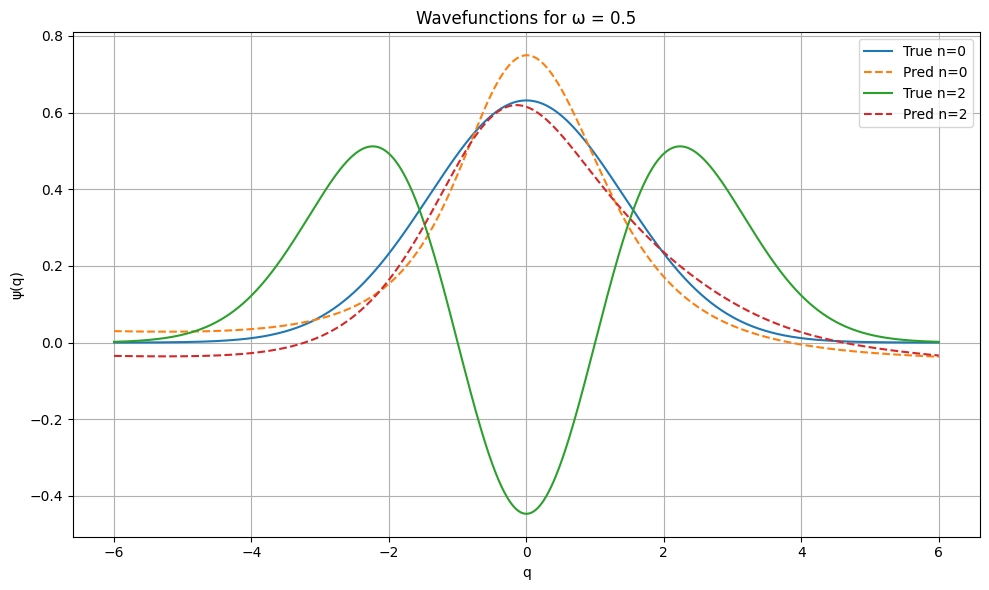

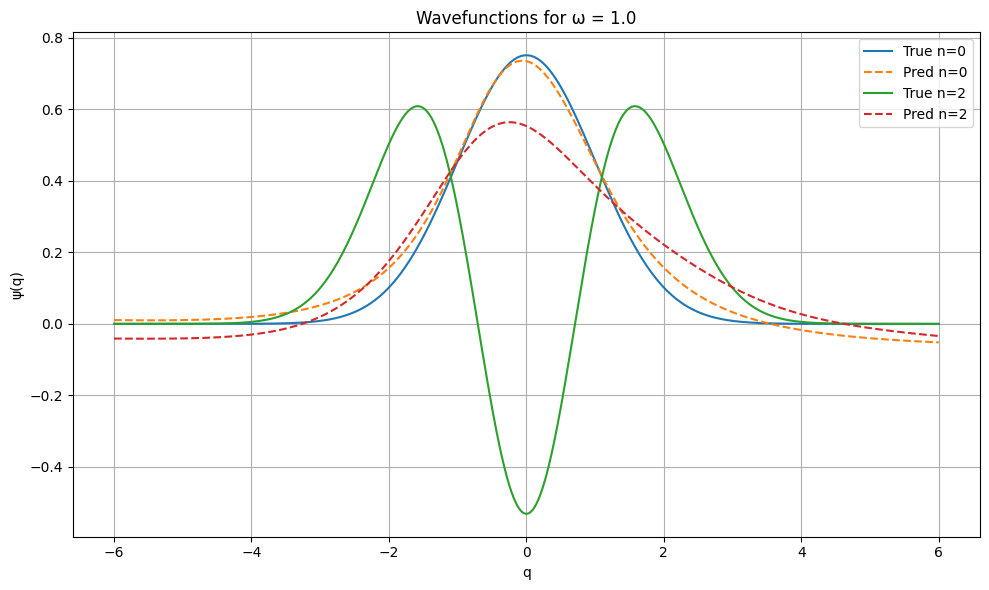

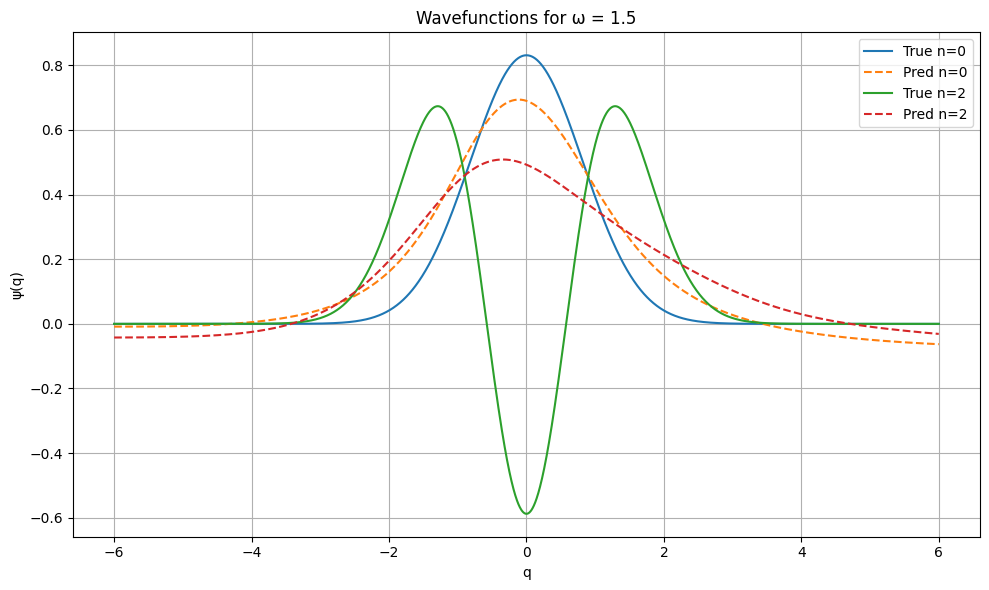

In [39]:
plot_pred_vs_actual(model, validation_loader, n_list=[0, 2], omega_list=[0.5, 1.0, 1.5])


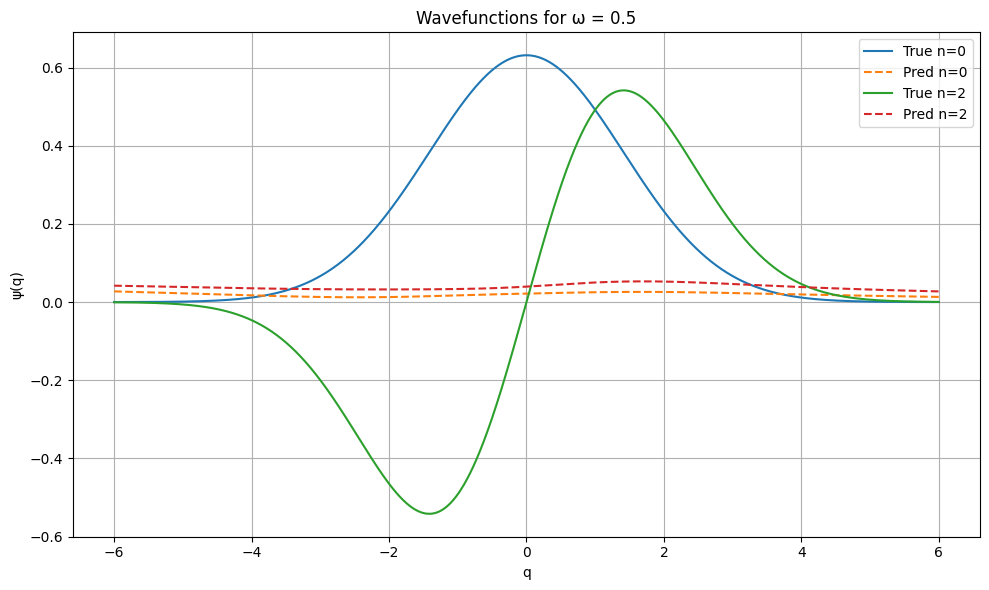

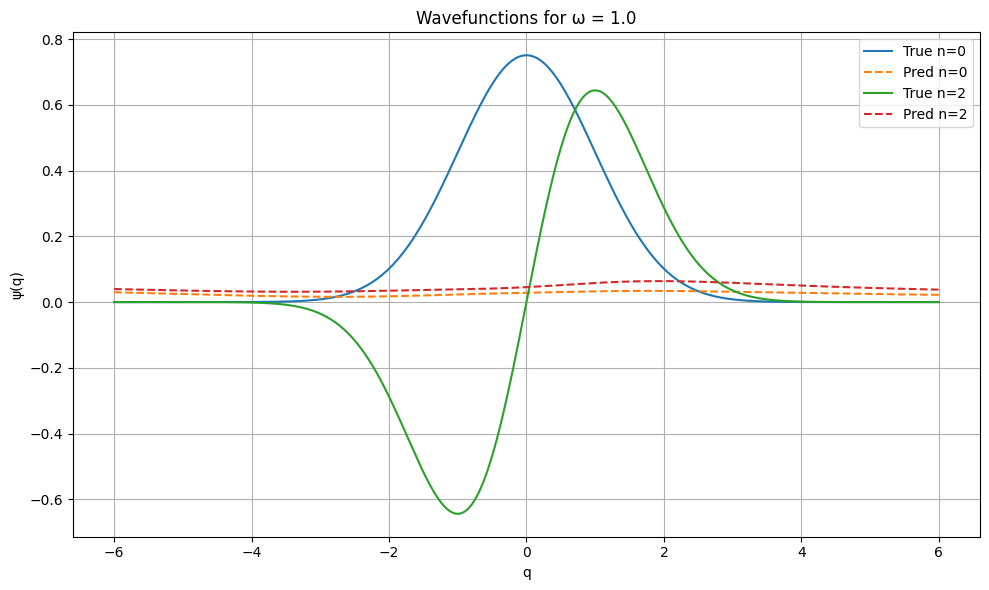

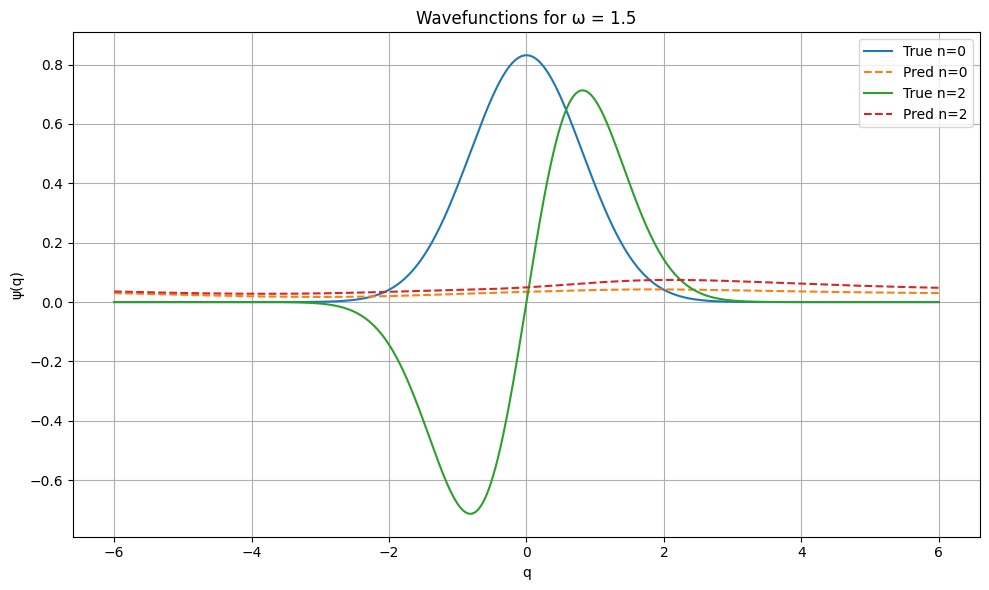

In [29]:
model= NNWaveFunction()
model.load_state_dict(torch.load("best_model_epoch_10000_no_nodal.pt", map_location=torch.device('cpu')))
model.eval()
plot_pred_vs_actual(model, validation_loader, n_list=[0, 2], omega_list=[0.5, 1.0, 1.5])
